# Instacart Basket Data Analysis

### Content 
### 4.7. Creating the customer profile 
### 4.8. Aggregating the max, mean, and min variables on a customer profile level  
### 5. Comparing departments and products 
### 6. Customers distribution by their brand loyalty

In [3]:
### Importing libraries

In [4]:
# Import analysis and visualization libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing data

In [6]:
# Create Path
path=r'C:\Users\Oksana Stepanova\OneDrive\Документи\Instacart Basket Analysis'

In [7]:
# Import Instacart merged dataframe
df_instacart=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged.pkl'))

In [8]:
# Check for imported data
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,spender_flag,median_days_prior_order,order_frequency_flag,gender,states,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
df_instacart.shape

(32399732, 31)

### 4.7. Creating the customer profile

In [11]:
# Create a new column 'age_category' and assign
# young: 35 yo and younger
# adults: 35 - 60 yo
# seniors: 61 and older
df_instacart.loc[df_instacart['age']<=35, 'age_category']='young'
df_instacart.loc[(df_instacart['age']>35) & (df_instacart['age']<=60), 'age_category']='adults'
df_instacart.loc[df_instacart['age']>60, 'age_category']='seniors'

In [12]:
# Check for dataframe shape after adding 'age_category'
df_instacart.shape

(32399732, 32)

In [13]:
# Create a new column 'income_category' and assign
# low income: <= 50k
# medium income: > 50k and <=250k
# high income: > 250k
df_instacart.loc[df_instacart['income']<=50000, 'income_category']='Low income'
df_instacart.loc[(df_instacart['income']>50000) & (df_instacart['income']<=250000), 'income_category']='Medium income'
df_instacart.loc[df_instacart['income']>250000, 'income_category']='High income'

In [14]:
# Check for dataframe shape after adding 'income_category'
df_instacart.shape

(32399732, 33)

In [15]:
# set the seed
np.random.seed(4)

In [16]:
# Creat a new list 'dev'
dev = np.random.rand(len(df_instacart)) <= 0.7

In [17]:
# Store 70% of sample in the dataframe 'big'
df_instacart_big=df_instacart[dev]

In [18]:
# Store 30% of sample in the dataframe 'small'
df_instacart_small=df_instacart[~dev]

In [20]:
len(df_instacart_big)+len(df_instacart_small)

32399732

In [21]:
# Create a new column 'customer_profile'
df_instacart_small['customer_profile']=df_instacart_small['age_category']+', '+df_instacart_small['income_category']+', '+df_instacart_small['family_status']

C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_7924\4119639163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart_small['customer_profile']=df_instacart_small['age_category']+', '+df_instacart_small['income_category']+', '+df_instacart_small['family_status']


In [22]:
df_instacart_small.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,states,age,date_joined,number_dependants,family_status,income,age_category,income_category,customer_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,young,Low income,"young, Low income, married"
2,473747,1,3,3,12,21.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,young,Low income,"young, Low income, married"
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,young,Low income,"young, Low income, married"
6,550135,1,7,1,9,20.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,young,Low income,"young, Low income, married"
10,2539329,1,1,2,8,NaN,True,14084,2,0,...,Female,Alabama,31,2/17/2019,3,married,40423,young,Low income,"young, Low income, married"


In [23]:
df_instacart_small.shape

(9719609, 34)

In [25]:
df_instacart_small['customer_profile'].value_counts(dropna=False)

customer_profile
adults, Medium income, married                            2555237
seniors, Medium income, married                           2158184
young, Medium income, married                             1338652
adults, Medium income, single                              816607
seniors, Medium income, divorced/widowed                   725569
young, Medium income, single                               567336
young, Medium income, living with parents and siblings     393641
adults, Low income, married                                281413
young, Low income, married                                 251943
seniors, Low income, married                               202219
young, Low income, single                                  112838
adults, Low income, single                                  90543
young, Low income, living with parents and siblings         70955
seniors, Low income, divorced/widowed                       65566
adults, Medium income, divorced/widowed                    

### 4.8. Aggregating the max, mean, and min variables on a customer profile level 

In [32]:
# Customer profile by number of orders
customer_profile_num_orders=df_instacart_small.groupby('customer_profile').agg({'order_number':['mean', 'min', 'max', 'std']}).sort_values(by=('order_number', 'mean'), ascending=False)

In [34]:
customer_profile_num_orders.head(10)

order_number          \
                                                           mean min max   
customer_profile                                                          
adults, High income, single                           24.787806   1  99   
young, High income, living with parents and sib...    23.970149   1  87   
seniors, High income, divorced/widowed                21.503174   1  99   
seniors, High income, married                         20.113406   1  99   
adults, High income, married                          19.384811   1  99   
young, Medium income, living with parents and s...    17.734095   1  99   
young, High income, married                           17.474457   1  99   
adults, Medium income, single                         17.454814   1  99   
seniors, Medium income, divorced/widowed              17.386424   1  99   
young, Medium income, married                         17.306455   1  99   

                                                               
                                                          std  
customer_profile                                               
adults, High income, single                         23.792873  
young, High income, living with parents and sib...  22.907225  
seniors, High income, divorced/widowed              20.818106  
seniors, High income, married                       18.227205  
adults, High income, married                        18.736873  
young, Medium income, living with parents and s...  17.979267  
young, High income, married                         16.804497  
adults, Medium income, single                       17.788602  
seniors, Medium income, divorced/widowed            17.801930  
young, Medium income, married                       17.552419

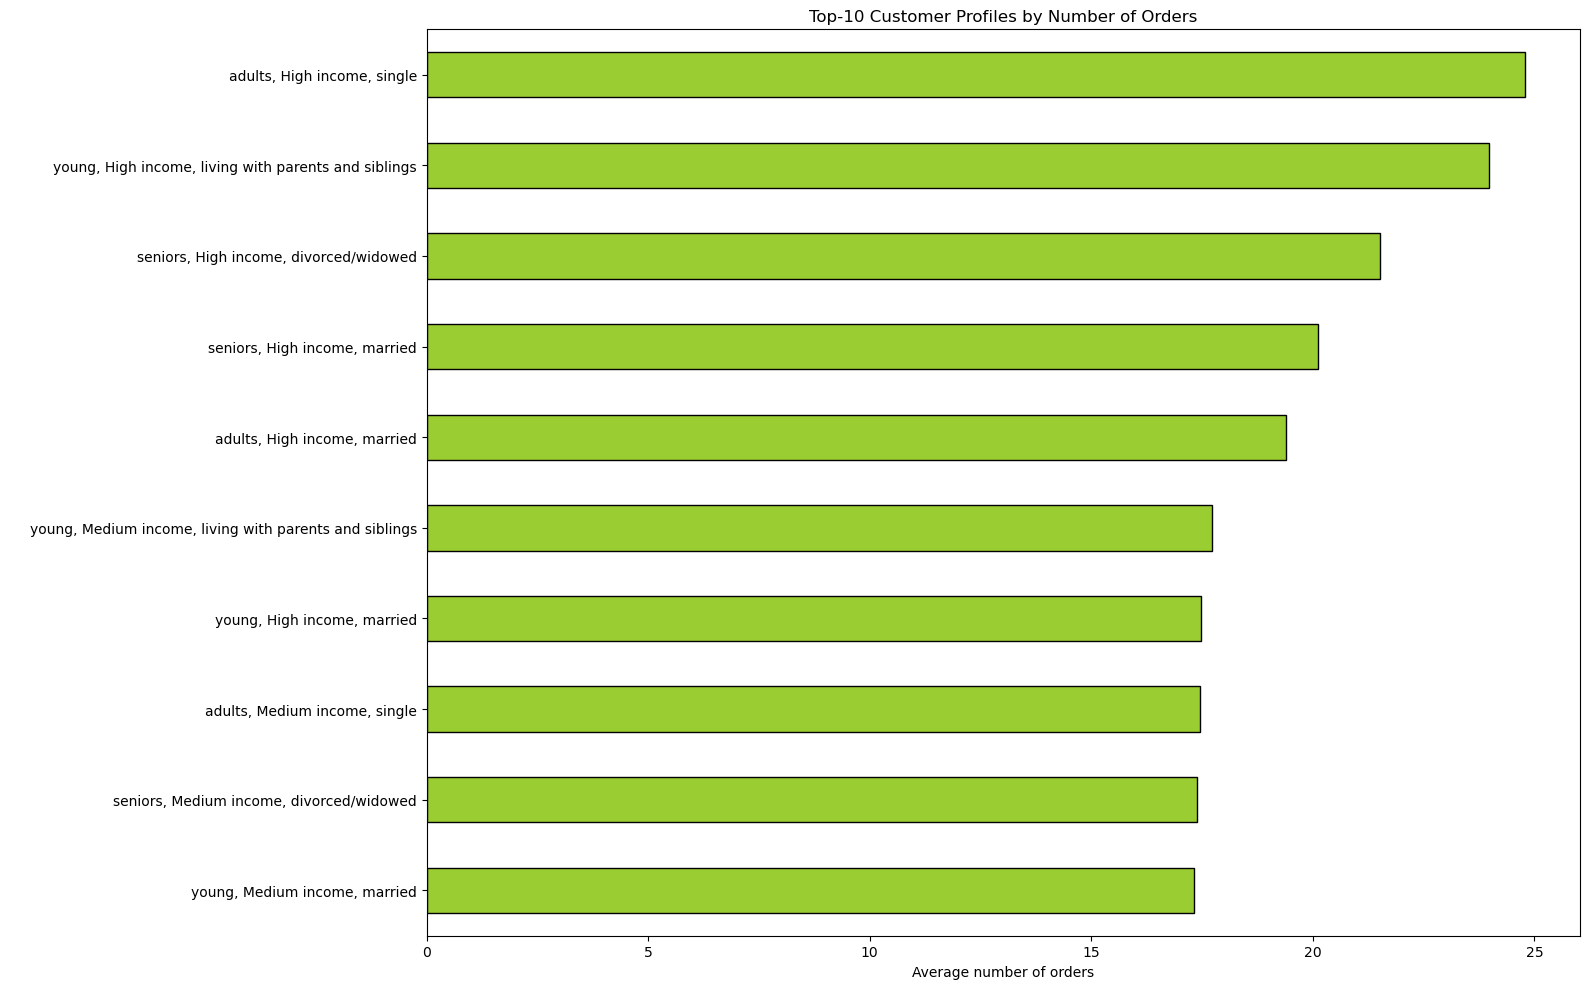

In [75]:
# Create a bar chart for customer profile by number of orders
plt.figure(figsize=(16, 10))

top_10_customer_profile_num_orders=customer_profile_num_orders.head(10)
bar_customer_profile_num_orders=top_10_customer_profile_num_orders['order_number', 'mean'].sort_values(ascending=True).plot(kind='barh', stacked = False, edgecolor = 'black', color='#9acd32')

plt.title('Top-10 Customer Profiles by Number of Orders')
plt.ylabel(' ')
plt.xlabel('Average number of orders')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profile_num_orders.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

In [37]:
# Customer profile by days since prior order
customer_profile_prior_order=df_instacart_small.groupby('customer_profile').agg({'days_since_prior_order':['mean', 'min', 'max', 'std']}).sort_values(by=('days_since_prior_order', 'mean'))

In [38]:
customer_profile_prior_order.head(10)

days_since_prior_order  \
                                                                     mean   
customer_profile                                                            
young, High income, living with parents and sib...               8.257598   
adults, High income, divorced/widowed                            8.941606   
adults, High income, single                                      9.540119   
seniors, High income, divorced/widowed                           9.594611   
seniors, High income, married                                   10.048633   
adults, High income, married                                    10.597980   
young, Medium income, living with parents and s...              10.914533   
seniors, Medium income, divorced/widowed                        10.997691   
adults, Medium income, single                                   11.008728   
young, High income, married                                     11.039411   

                                                                         
                                                    min   max       std  
customer_profile                                                         
young, High income, living with parents and sib...  0.0  30.0  7.925939  
adults, High income, divorced/widowed               0.0  30.0  7.969396  
adults, High income, single                         0.0  30.0  8.271347  
seniors, High income, divorced/widowed              0.0  30.0  8.219176  
seniors, High income, married                       0.0  30.0  8.081768  
adults, High income, married                        0.0  30.0  8.529491  
young, Medium income, living with parents and s...  0.0  30.0  8.713925  
seniors, Medium income, divorced/widowed            0.0  30.0  8.758439  
adults, Medium income, single                       0.0  30.0  8.736168  
young, High income, married                         0.0  30.0  8.391021

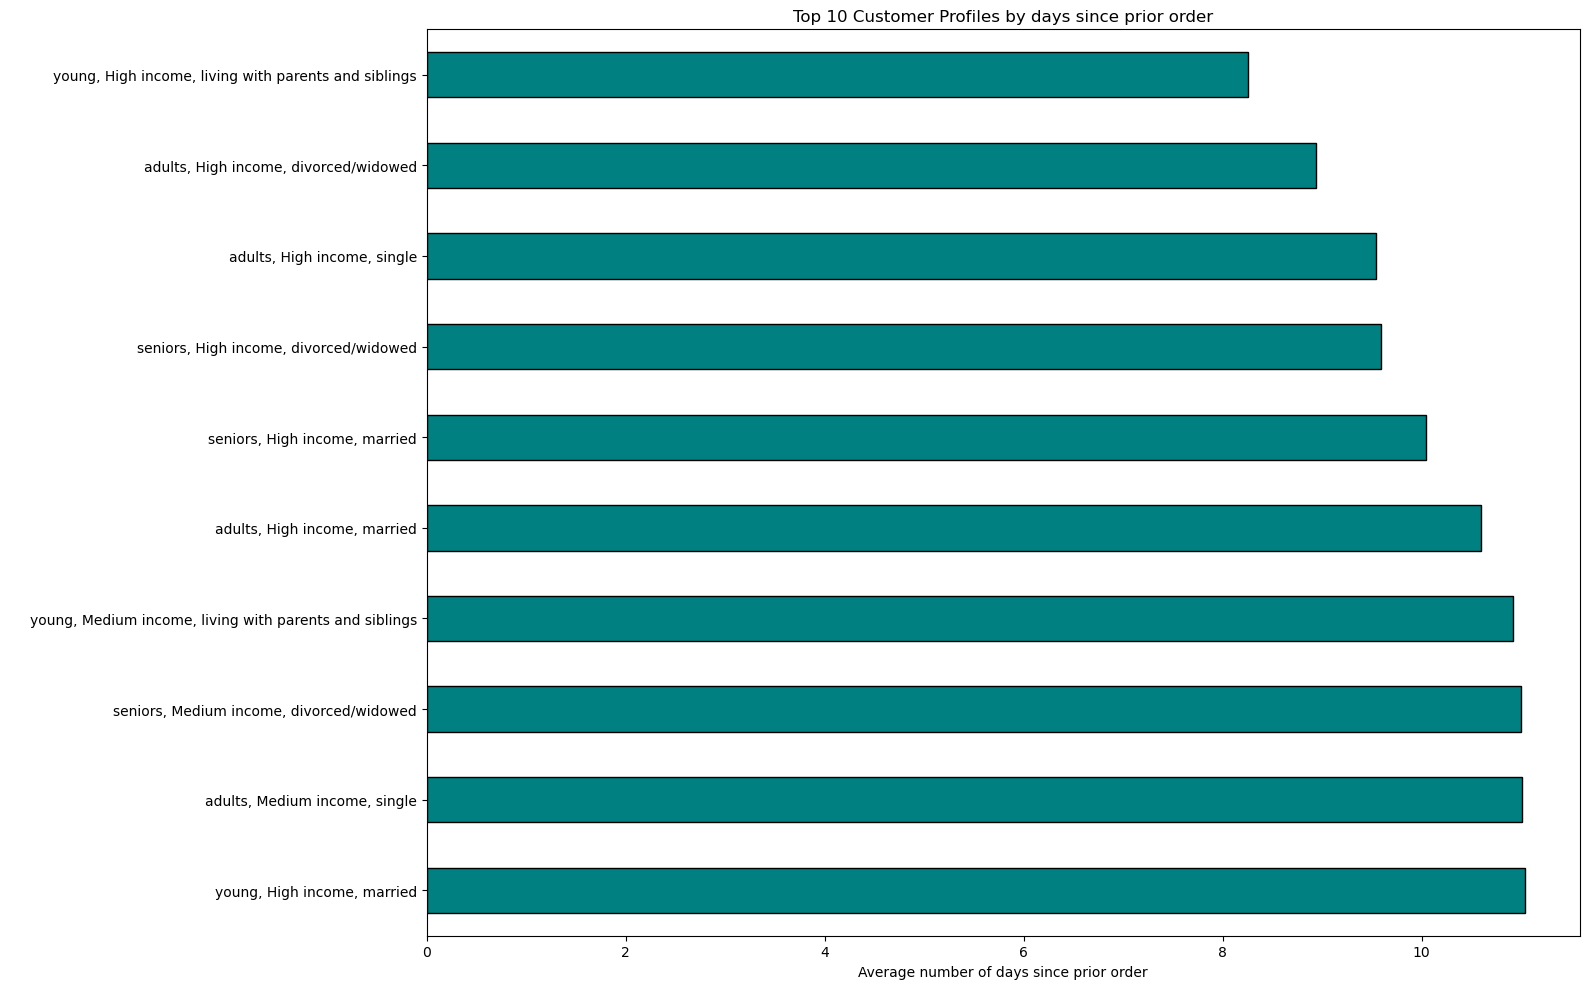

In [76]:
# Create a bar chart for customer profile by days since prior order
plt.figure(figsize=(16, 10))

top_10_customer_profile_prior_order=customer_profile_prior_order.head(10)
bar_customer_profile_prior_order=top_10_customer_profile_prior_order['days_since_prior_order', 'mean'].sort_values(ascending=False).plot(kind='barh', stacked = False, edgecolor = 'black', color='#008080')

plt.title('Top 10 Customer Profiles by days since prior order')
plt.ylabel(' ')
plt.xlabel('Average number of days since prior order')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profile_prior_order.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

In [41]:
# Customer profile by average spending
customer_profile_average_spending=df_instacart_small.groupby('customer_profile').agg({'average_spending':['mean', 'min', 'max', 'std']}).sort_values(by=('average_spending', 'mean'), ascending=False)

In [42]:
customer_profile_average_spending.head(10)

average_spending            \
                                                               mean       min   
customer_profile                                                                
young, Medium income, living with parents and s...         7.964596  4.656522   
adults, Medium income, divorced/widowed                    7.957657  3.766667   
young, Medium income, single                               7.952855  5.375000   
young, Medium income, married                              7.949005  5.156306   
adults, Medium income, married                             7.923541  1.300000   
adults, High income, single                                7.923060  5.978947   
adults, Medium income, single                              7.917858  2.172727   
seniors, Medium income, married                            7.916618  1.100000   
seniors, Medium income, divorced/widowed                   7.915513  1.200000   
seniors, High income, married                              7.773697  6.113158   

                                                                         
                                                          max       std  
customer_profile                                                         
young, Medium income, living with parents and s...  13.677778  0.575450  
adults, Medium income, divorced/widowed             12.116667  0.634384  
young, Medium income, single                        16.700000  0.562425  
young, Medium income, married                       16.666667  0.568123  
adults, Medium income, married                      20.114286  0.621032  
adults, High income, single                          9.473750  0.513157  
adults, Medium income, single                       16.294737  0.620057  
seniors, Medium income, married                     23.200000  0.627514  
seniors, Medium income, divorced/widowed            16.931250  0.629164  
seniors, High income, married                        9.480000  0.596344

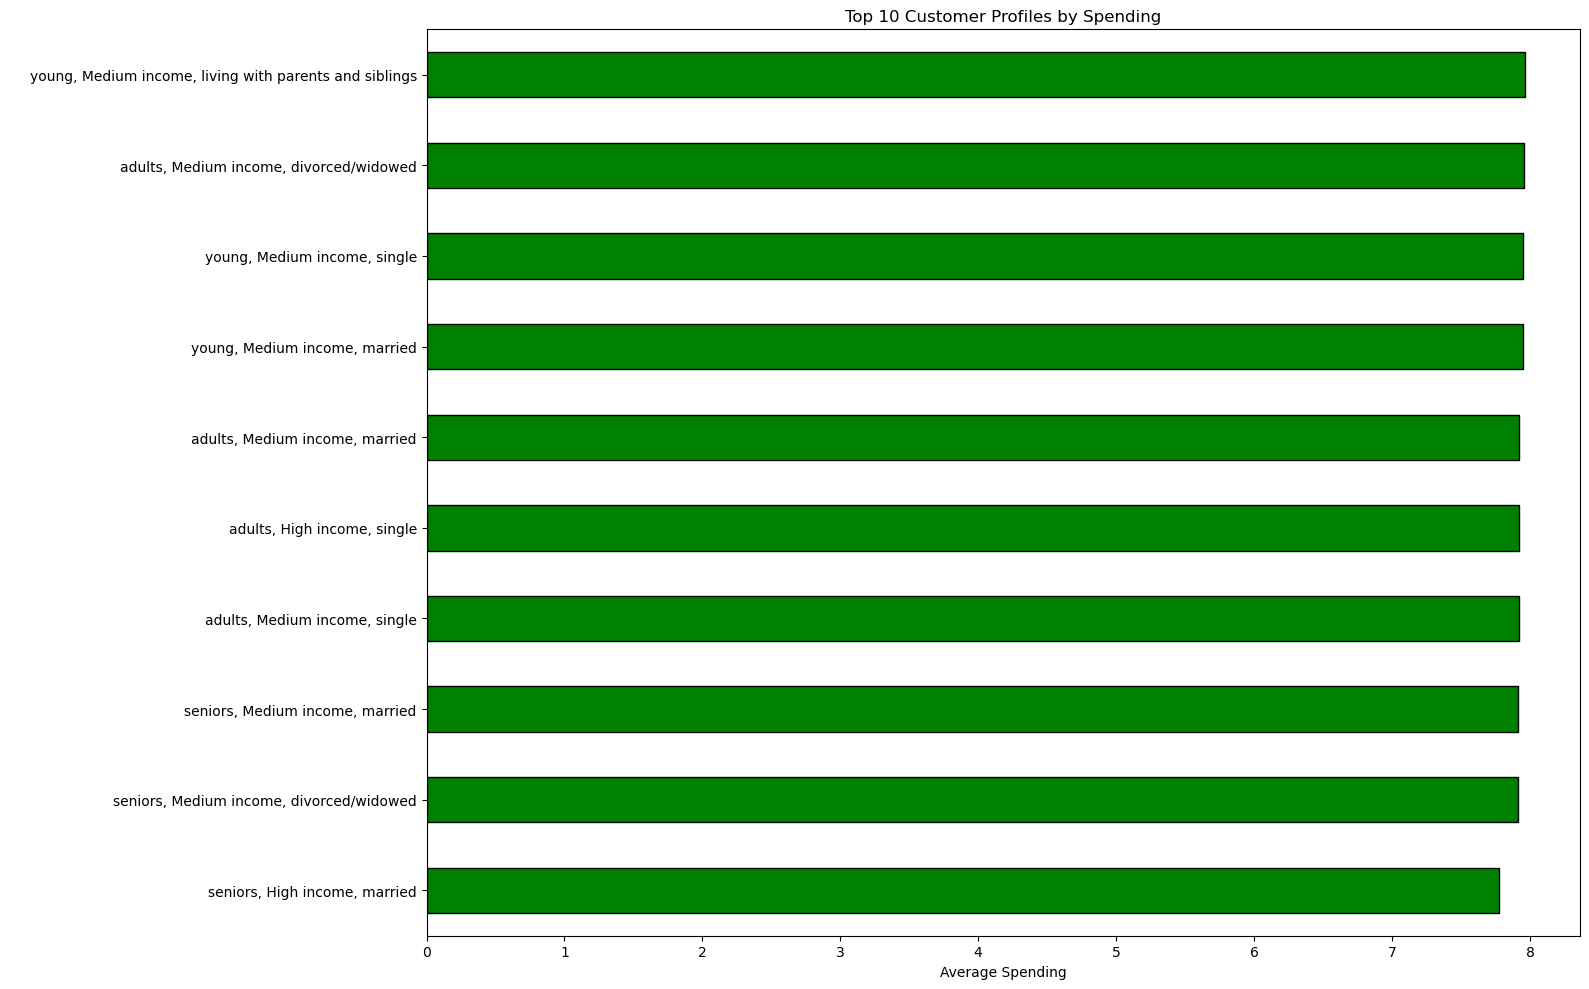

In [77]:
# Create a bar chart for customer profile by average spending
plt.figure(figsize=(16, 10))

top_10_customer_profile_avg_spending=customer_profile_average_spending.head(10)
bar_customer_profile_avg_spending=top_10_customer_profile_avg_spending['average_spending', 'mean'].sort_values(ascending=True).plot(kind='barh', stacked = False, edgecolor = 'black', color='#008000')

plt.title('Top 10 Customer Profiles by Spending')
plt.ylabel(' ')
plt.xlabel('Average Spending')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profile_avg_spending.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

In [44]:
# Customer profile by total expenditure
customer_profile_expenditure=df_instacart_small.groupby('customer_profile').agg({'prices':['sum']}).sort_values(by=('prices', 'sum'), ascending=False)

In [45]:
customer_profile_expenditure.head(10)

,prices
,sum
customer_profile,
"adults, Medium income, married",20243441.8
"seniors, Medium income, married",17088562.1
"young, Medium income, married",10642711.4
"adults, Medium income, single",6469562.7
"seniors, Medium income, divorced/widowed",5751141.2
"young, Medium income, single",4510417.6
"young, Medium income, living with parents and siblings",3134657.4
"adults, Low income, married",1860110.2


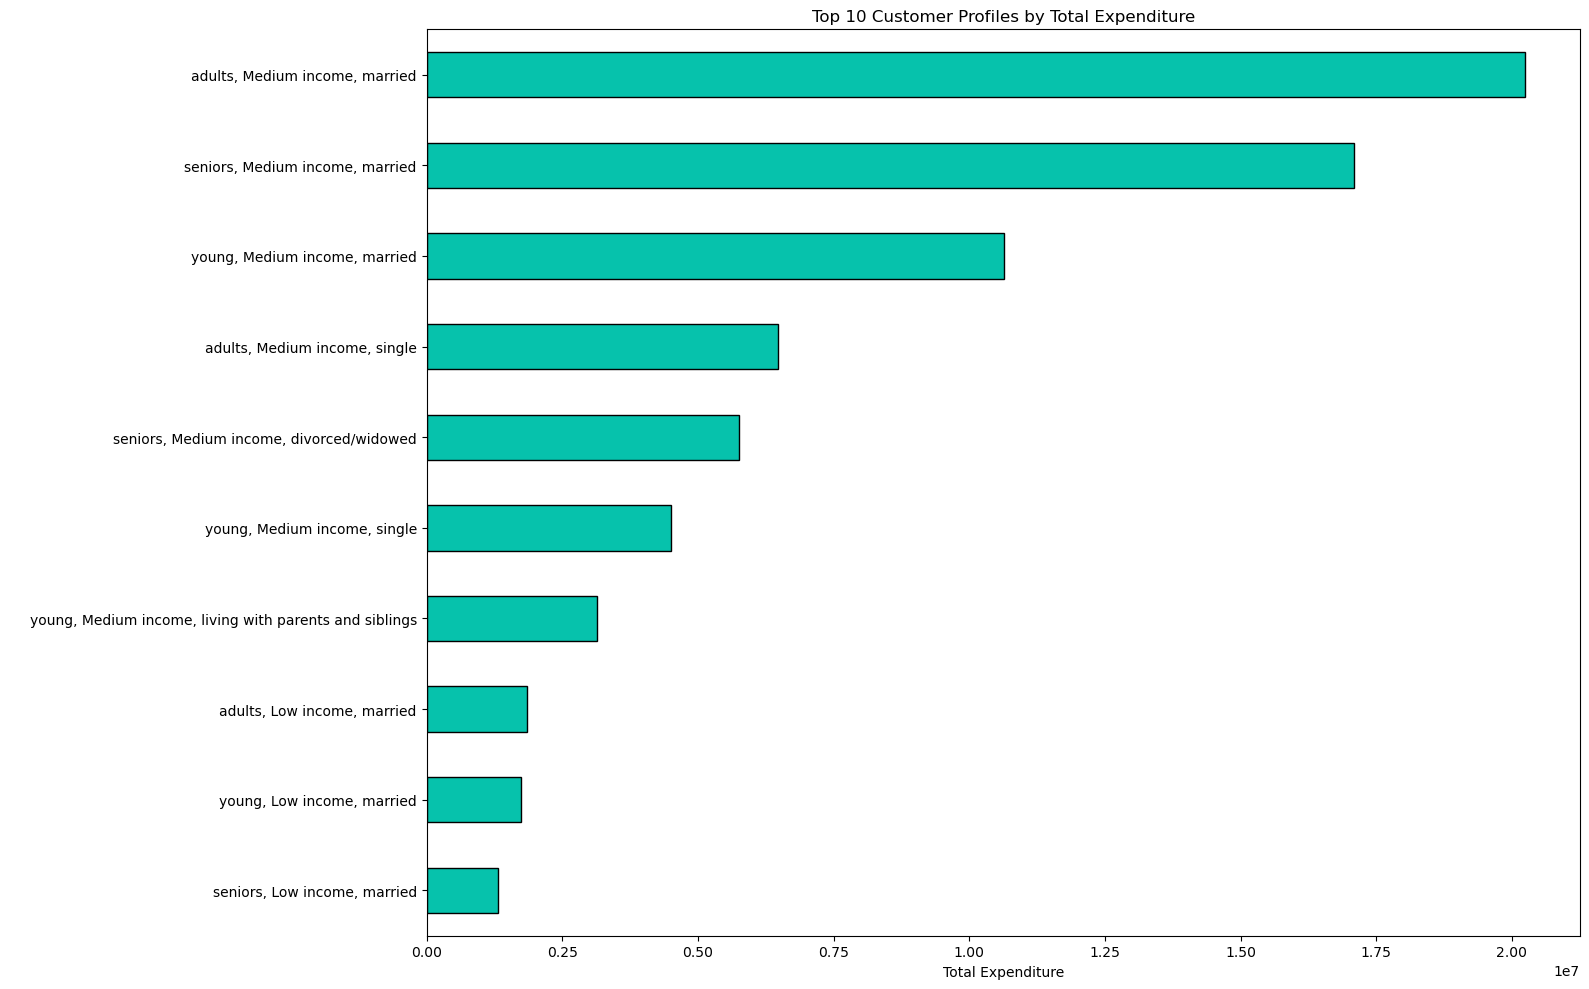

In [74]:
# Create a bar chart for customer profile by total expenditure
plt.figure(figsize=(16, 10))

top_10_customer_profile_expenditure=customer_profile_expenditure.head(10)
bar_customer_profile_expenditure=top_10_customer_profile_expenditure['prices', 'sum'].sort_values(ascending=True).plot(kind='barh', stacked = False, edgecolor = 'black', color='#06c2ac')

plt.title('Top 10 Customer Profiles by Total Expenditure')
plt.ylabel(' ')
plt.xlabel('Total Expenditure')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profile_expenditure.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

### 5. Comparing departments and products

In [79]:
# Maping deparment id to names
department_mapping = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

In [80]:
# Create a new column 'deparment_name'
df_instacart_small['department_name']=df_instacart_small['department_id'].map(department_mapping).fillna('missing')

C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_7924\3397394557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart_small['department_name']=df_instacart_small['department_id'].map(department_mapping).fillna('missing')


In [81]:
df_instacart_small.shape

(9719609, 35)

In [83]:
df_instacart_small['department_name'].value_counts(dropna=False)

department_name
produce            2843314
dairy eggs         1617033
snacks              867008
beverages           806522
frozen              669972
pantry              563237
bakery              352065
canned goods        320602
deli                315831
dry goods pasta     259868
household           220910
meat seafood        213075
breakfast           211199
personal care       133828
babies              126750
international        80935
alcohol              46140
pets                 29340
missing              20702
other                10953
bulk                 10325
Name: count, dtype: int64

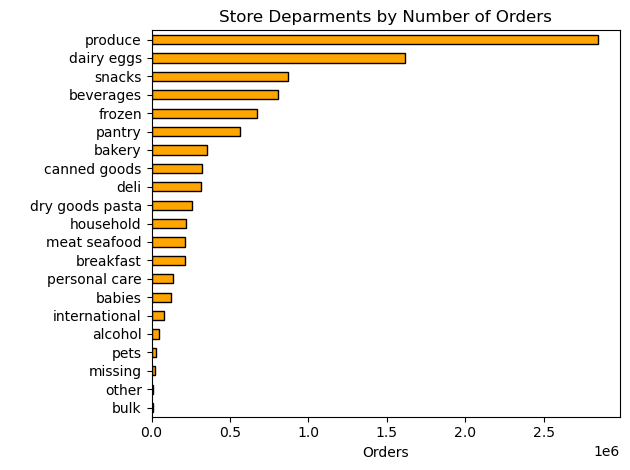

In [86]:
# Create a bar chart for store departments by the number of orders
bar_depts_count=df_instacart_small['department_name'].value_counts(dropna=False).sort_values(ascending=True).plot(kind='barh', stacked = False, edgecolor = 'black', color='#ffa500')

plt.title('Store Deparments by Number of Orders')
plt.ylabel(' ')
plt.xlabel('Orders')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_depts_count.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

In [144]:
# Display Top-10 departments by orders
df_instacart_small['department_name'].value_counts(dropna=False).head(10).reset_index()

,department_name,count
0,produce,2843314
1,dairy eggs,1617033
2,snacks,867008
3,beverages,806522
4,frozen,669972
5,pantry,563237
6,bakery,352065
7,canned goods,320602
8,deli,315831
9,dry goods pasta,259868


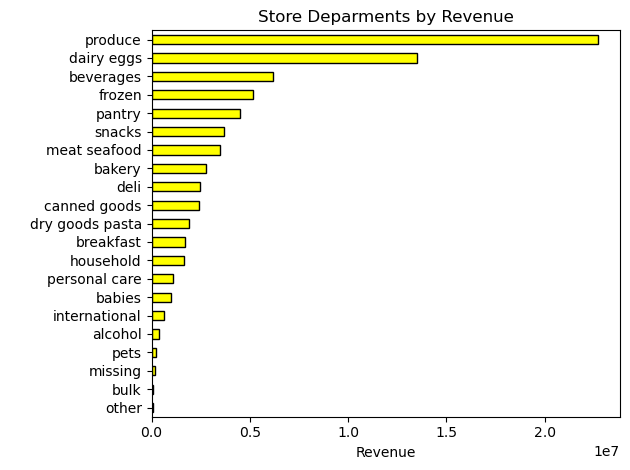

In [88]:
# Create a bard chart fro Store departments by revenue 
bar_depts_revenue=df_instacart_small.groupby('department_name')['prices'].sum().sort_values(ascending=True).plot(kind='barh', stacked = False, edgecolor = 'black', color='#ffff00')
plt.title('Store Deparments by Revenue')
plt.ylabel(' ')
plt.xlabel('Revenue')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_depts_revenue.png'), bbox_inches='tight', pad_inches=0.1)
plt.showb()

In [147]:
# Display Top-10 departments by revenue
df_instacart_small.groupby('department_name')['prices'].sum().sort_values(ascending=False).head(10).reset_index()

,department_name,prices
0,produce,22689428.2
1,dairy eggs,13478271.4
2,beverages,6197923.1
3,frozen,5181643.4
4,pantry,4514394.7
5,snacks,3707680.4
6,meat seafood,3473749.2
7,bakery,2765881.1
8,deli,2461521.7
9,canned goods,2417979.7


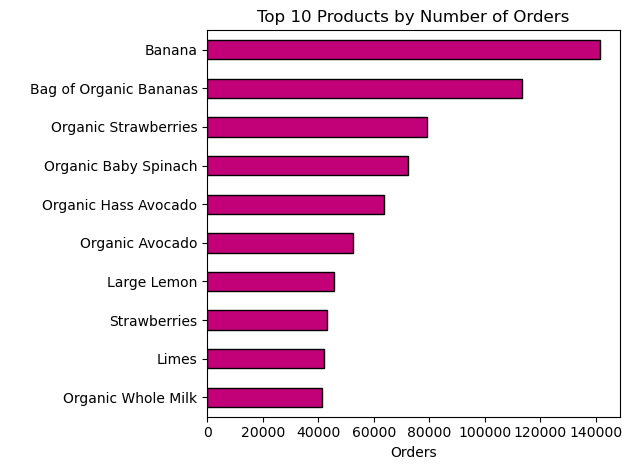

In [90]:
# Create a bar chart for the top 10 products by the number of orders
bar_prods_count=df_instacart_small['product_name'].value_counts(dropna=False).head(10).sort_values(ascending=True).plot(kind='barh', stacked = False, edgecolor = 'black', color='#c20078')

plt.title('Top 10 Products by Number of Orders')
plt.ylabel(' ')
plt.xlabel('Orders')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_prods_count.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

In [98]:
top_10_prods_revenue=df_instacart_small.groupby('product_name')['prices'].sum().sort_values(ascending=False).head(10)

In [99]:
top_10_prods_revenue

product_name
Banana                      1742688.6
Bag of Organic Bananas      1168535.0
Large Lemon                  641676.0
Limes                        616297.5
Organic Baby Spinach         592581.2
Organic Strawberries         577853.4
Organic Whole Milk           530598.4
Cucumber Kirby               384687.6
Apple Honeycrisp Organic     359211.6
Organic Cucumber             344429.8
Name: prices, dtype: float64

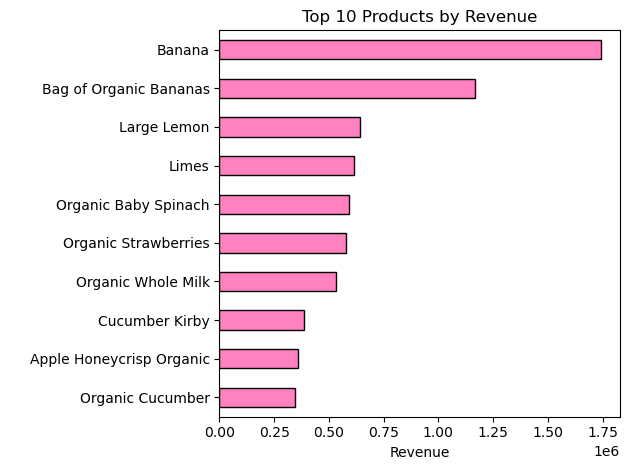

In [104]:
# Create a bard chart for top 10 Products by revenue 
bar_prods_revenue=top_10_prods_revenue.sort_values(ascending=True).plot(kind='barh', stacked = False, edgecolor = 'black', color='#ff81c0')
plt.title('Top 10 Products by Revenue')
plt.ylabel(' ')
plt.xlabel('Revenue')

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_prods_revenue.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

### 6. Customers distribution by their brand loyalty

In [109]:
df_instacart['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    15874128
Loyal customer      10282763
New customer         6242841
Name: count, dtype: int64

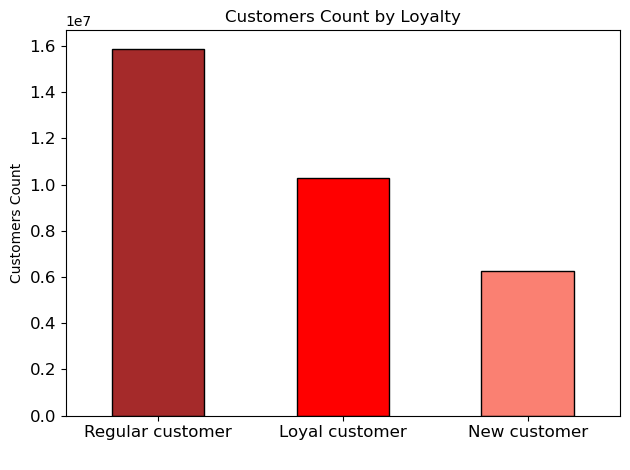

In [125]:
# Create a bar chart for Customers distribution by Loyalty
bar_width=0.35
color_loyalty=['#a52a2a', '#ff0000', '#fa8072']
bar_ords_loyalty=df_instacart['loyalty_flag'].value_counts(dropna=False).plot(kind='bar', stacked = False, edgecolor = 'black', color=color_loyalty)

plt.title('Customers Count by Loyalty')
plt.xlabel(' ')
plt.ylabel('Customers Count')

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_loyalty.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

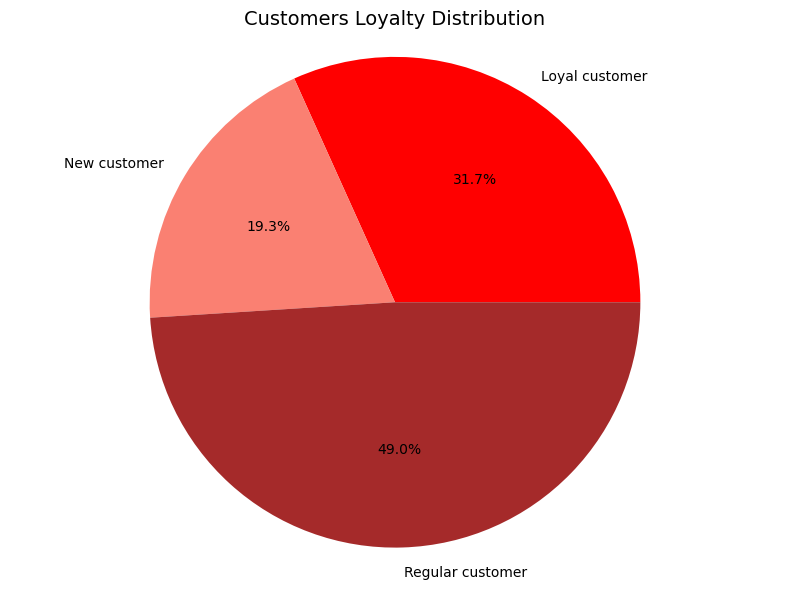

In [150]:
# Calculate percentage distribution by loyalty
loyalty_distribution=(df_instacart['loyalty_flag'].value_counts(normalize=True)*100).sort_index()

# Create a pie chart: percentage of customers by loyalty
plt.figure(figsize=(8, 6))
pie_loyalty=plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors=['#ff0000','#fa8072', '#a52a2a'])

# Add title
plt.title('Customers Loyalty Distribution', fontsize=14) 

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the pie chart for customers percentage by income
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

# Displaying the pie chart
plt.tight_layout()  
plt.show()

In [121]:
# Customers distribution by loyalty and the number of days sisnce prior order
df_custs_loyalty_prior_order=df_instacart.groupby('loyalty_flag').agg({'days_since_prior_order':['mean', 'min', 'max', 'std']}).sort_values(by=('days_since_prior_order', 'mean'), ascending=True)

In [122]:
df_custs_loyalty_prior_order

days_since_prior_order                      
                                   mean  min   max        std
loyalty_flag                                                 
Loyal customer                 6.026625  0.0  30.0   4.561068
Regular customer              12.155101  0.0  30.0   8.456115
New customer                  17.976856  0.0  30.0  10.131204

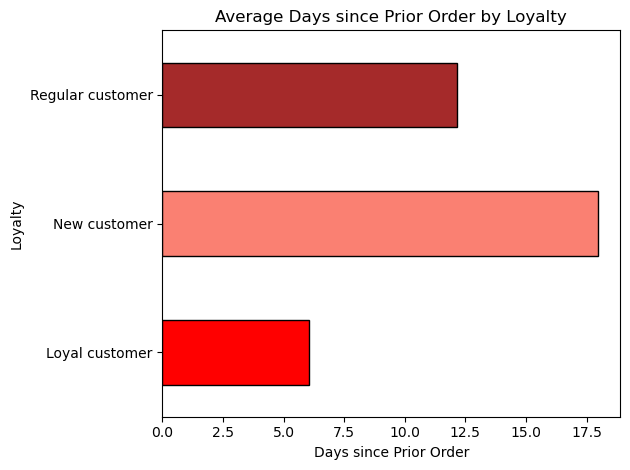

In [130]:
# Creating bar chart for avg number of days since prior order by loyalty
avg_prior_order_by_loyalty=df_instacart.groupby('loyalty_flag')['days_since_prior_order'].mean()

color_loyalty=['#ff0000', '#fa8072', '#a52a2a']
bar_loyalty_prior_order=avg_prior_order_by_loyalty.plot(kind='barh', stacked = False, edgecolor = 'black', color=color_loyalty)
plt.title('Average Days since Prior Order by Loyalty')
plt.xlabel('Days since Prior Order')
plt.ylabel('Loyalty')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_prior_order.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

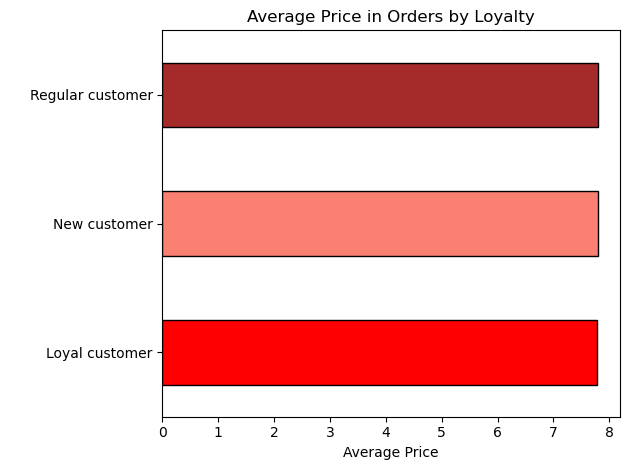

In [151]:
# Group loyalty category and average price in the orders
avg_price_by_loyalty=df_instacart.groupby('loyalty_flag')['prices'].mean()

# Creating bar chart for average price in orders by loyalty category
color_loyalty=['#ff0000', '#fa8072', '#a52a2a']
bar_avg_price_by_lyalty=avg_price_by_loyalty.plot(kind='barh', stacked = False, edgecolor = 'black', color=color_loyalty)
plt.title('Average Price in Orders by Loyalty')
plt.xlabel('Average Price')
plt.ylabel(' ')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_price_by_loyalty.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

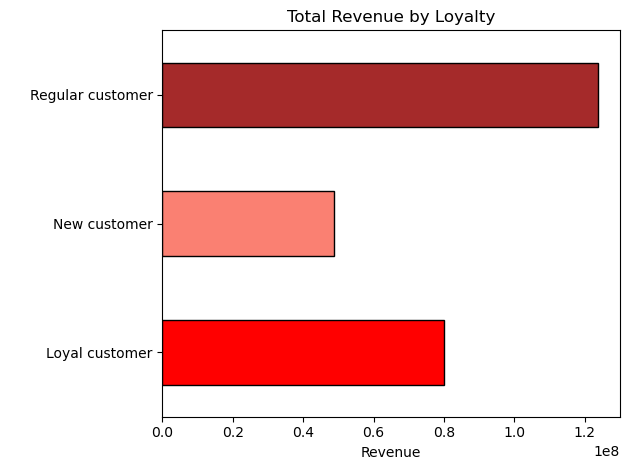

In [152]:
# Group loyalty category and total revenue
revenue_by_loyalty=df_instacart.groupby('loyalty_flag')['prices'].sum()

# Creating bar chart for total revenue by loyalty category
color_loyalty=['#ff0000', '#fa8072', '#a52a2a']
bar_revenue_loyalty=revenue_by_loyalty.plot(kind='barh', stacked = False, edgecolor = 'black', color=color_loyalty)
plt.title('Total Revenue by Loyalty')
plt.xlabel('Revenue')
plt.ylabel(' ')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_revenue_by_loyalty.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


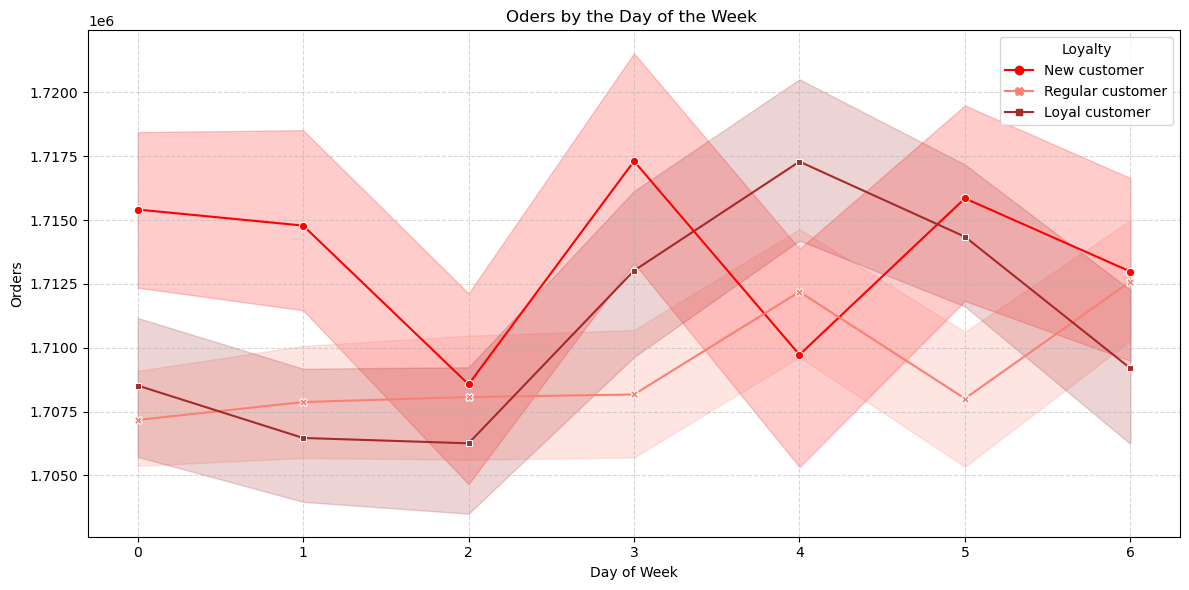

In [166]:
# Create a line chart for number of orders by the day of the week for three loyalty categories 

color_loyalty=['#ff0000', '#fa8072', '#a52a2a']
plt.figure(figsize=(12, 6))

line_loyalty_dpw=sns.lineplot(data=df_instacart_small, x='orders_day_of_week', y='order_id', hue='loyalty_flag', palette=color_loyalty,
                                             style='loyalty_flag', markers=True, dashes=False)
plt.title('Oders by the Day of the Week ')
plt.xlabel('Day of Week')
plt.ylabel('Orders')
plt.legend(title='Loyalty', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [167]:
# Export the line chart
line_loyalty_dpw.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_loyalty_dow.png'))

C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


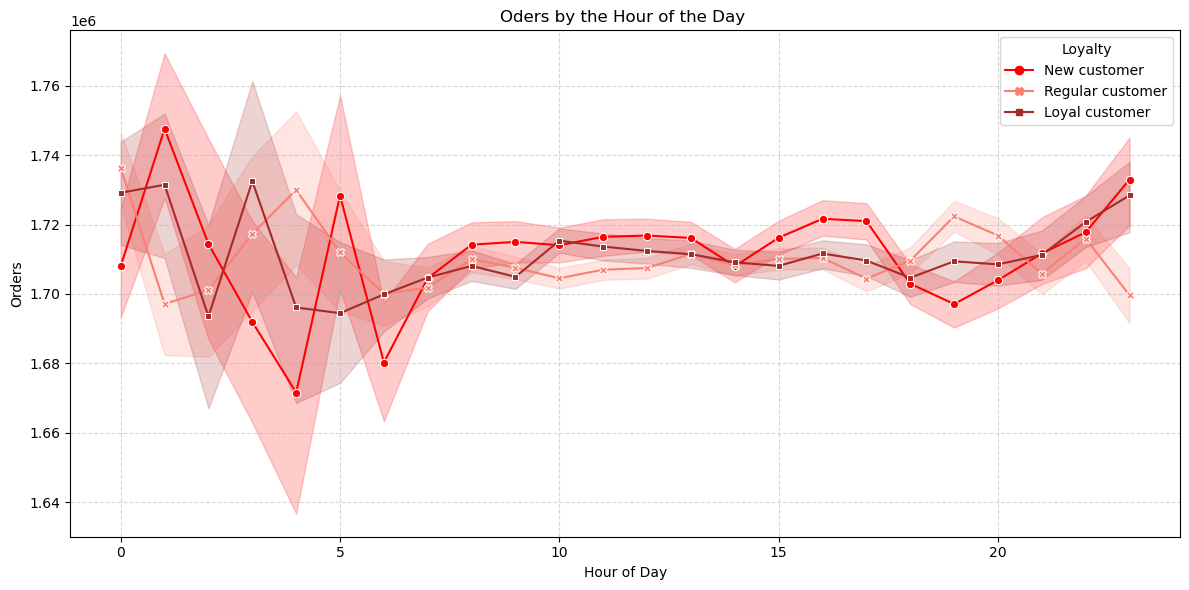

In [168]:
# Create a line chart for number of orders by the hour of the day for three loyalty categories 

color_loyalty=['#ff0000', '#fa8072', '#a52a2a']
plt.figure(figsize=(12, 6))

line_loyalty_hod=sns.lineplot(data=df_instacart_small, x='order_hour_of_day', y='order_id', hue='loyalty_flag', palette=color_loyalty,
                                             style='loyalty_flag', markers=True, dashes=False)
plt.title('Oders by the Hour of the Day ')
plt.xlabel('Hour of Day')
plt.ylabel('Orders')
plt.legend(title='Loyalty', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [169]:
# Export the line chart
line_loyalty_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_loyalty_hod.png'))

In [175]:
# Filter out customers by the loyalty category
loyal_custs=df_instacart[df_instacart['loyalty_flag']=='Loyal customer']
regular_custs=df_instacart[df_instacart['loyalty_flag']=='Regular customer']
new_custs=df_instacart[df_instacart['loyalty_flag']=='New customer']

In [176]:
loyal_custs.shape

(10282763, 33)

In [177]:
regular_custs.shape

(15874128, 33)

In [178]:
new_custs.shape

(6242841, 33)

In [179]:
# Group Loyal, Regular and New customers by the days of the week whne they place the orders
loyal_custs_dow_count=loyal_custs.groupby('orders_day_of_week').size()
regular_custs_dow_count=regular_custs.groupby('orders_day_of_week').size()
new_custs_dow_count=new_custs.groupby('orders_day_of_week').size()

In [180]:
loyal_custs_dow_count

orders_day_of_week
0    1754530
1    1843145
2    1352144
3    1266321
4    1291859
5    1456509
6    1318255
dtype: int64

In [181]:
regular_custs_dow_count

orders_day_of_week
0    3168568
1    2748908
2    2046701
3    1842272
4    1796704
5    1988931
6    2282044
dtype: int64

In [182]:
new_custs_dow_count

orders_day_of_week
0    1280231
1    1067245
2     814260
3     731272
4     694609
5     759636
6     895588
dtype: int64

In [183]:
# Define the number of days of week
number_dow_range=len(loyal_custs_dow_count.index)

In [184]:
number_dow_range

7

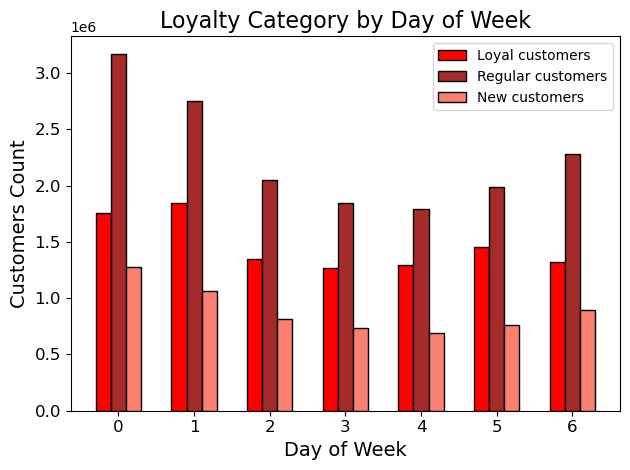

In [187]:
# Set the bar width
bar_width=0.2

# Set x locations for the bar chart
x=np.arange(number_dow_range)

# Create a bar chart for loyal customers
# such that it will be placed to the left
multi_bar_loyal_custs=plt.bar(x-bar_width, loyal_custs_dow_count, bar_width, edgecolor='black', color='#ff0000', label='Loyal customers')

# Create a bar chart for Regular customers
multi_bar_regular_custs=plt.bar(x, regular_custs_dow_count, bar_width, edgecolor='black', color='#a52a2a', label='Regular customers')

# Create a bar chart for New customers
# such that it will be placed to the right
multi_bar_new_custs=plt.bar(x+bar_width, new_custs_dow_count, bar_width, edgecolor='black', color='#fa8072', label='New customers')

# Add title and axis labels
plt.title('Loyalty Category by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Customers Count', fontsize=14)

# Customize tick labels
plt.xticks(x, loyal_custs_dow_count.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Customize legends
plt.legend(title='Loyalty', fontsize=12)
plt.legend()

# Show and save the bar chart
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'multi_bar_loyalty_by_dow.png'))
plt.show()

In [188]:
# Group Loyal, Regular and New customers by the hour of the day when they place the orders
loyal_custs_hod_count=loyal_custs.groupby('order_hour_of_day').size()
regular_custs_hod_count=regular_custs.groupby('order_hour_of_day').size()
new_custs_hod_count=new_custs.groupby('order_hour_of_day').size()

In [189]:
loyal_custs_hod_count

order_hour_of_day
0      61741
1      30177
2      17784
3      13373
4      16877
5      29345
6     112845
7     346651
8     643813
9     882645
10    937543
11    872900
12    806910
13    824375
14    835070
15    809662
16    743659
17    584512
18    449269
19    360227
20    309232
21    264503
22    206126
23    123524
dtype: int64

In [190]:
regular_custs_hod_count

order_hour_of_day
0      110968
1       58757
2       35652
3       25902
4       25437
5       42586
6      134231
7      414285
8      806967
9     1167544
10    1329446
11    1338937
12    1293956
13    1304777
14    1322585
15    1311675
16    1265939
17    1054030
18     831093
19     628691
20     474220
21     385936
22     309395
23     201119
dtype: int64

In [191]:
new_custs_hod_count

order_hour_of_day
0      46033
1      26749
2      15924
3      11993
4      10918
5      16013
6      43374
7     129987
8     267083
9     403653
10    494344
11    523857
12    517238
13    531418
14    531073
15    540381
16    525146
17    448731
18    355864
19    269158
20    192548
21    145089
22    118638
23     77629
dtype: int64

In [192]:
# Define the number of hours  of the day
number_hod_range=len(loyal_custs_hod_count.index)

In [193]:
number_hod_range

24

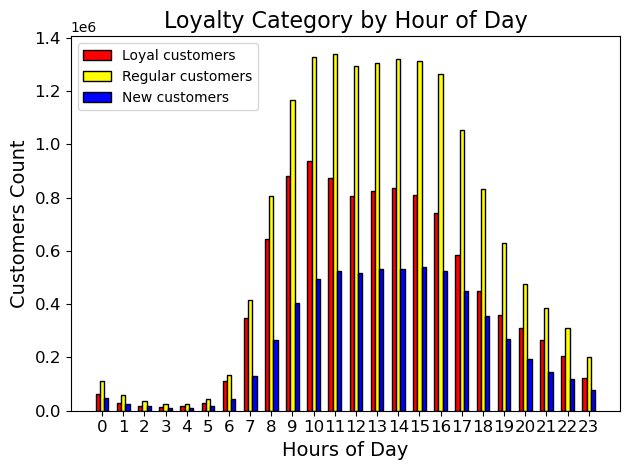

In [198]:
# Set the bar width
bar_width=0.2

# Set x locations for the bar chart
x=np.arange(number_hod_range)

# Create a bar chart for loyal customers
# such that it will be placed to the left
multi_bar_loyal_custs_hod=plt.bar(x-bar_width, loyal_custs_hod_count, bar_width, edgecolor='black', color='#ff0000', label='Loyal customers')

# Create a bar chart for Regular customers
multi_bar_regular_custs_hod=plt.bar(x, regular_custs_hod_count, bar_width, edgecolor='black', color='#ffff00', label='Regular customers')

# Create a bar chart for New customers
# such that it will be placed to the right
multi_bar_new_custs_hod=plt.bar(x+bar_width, new_custs_hod_count, bar_width, edgecolor='black', color='#0000ff', label='New customers')

# Add title and axis labels
plt.title('Loyalty Category by Hour of Day', fontsize=16)
plt.xlabel('Hours of Day', fontsize=14)
plt.ylabel('Customers Count', fontsize=14)

# Customize tick labels
plt.xticks(x, loyal_custs_hod_count.index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Customize legends
plt.legend(title='Loyalty', fontsize=12)
plt.legend()

# Show and save the bar chart
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'multi_bar_loyalty_by_hod.png'))
plt.show()

### Creating a line chart for the revenue by hour of the day 

In [138]:
revenue_hod=df_instacart_small.groupby('order_hour_of_day')['prices'].sum().reset_index()

In [139]:
revenue_hod

,order_hour_of_day,prices
0,0,511296.4
1,1,272082.8
2,2,164487.6
3,3,121350.9
4,4,125943.1
5,5,207049.1
6,6,684561.7
7,7,2090708.0
8,8,4017365.0
9,9,5712392.2


C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Total Revenue by Hour of the Day')

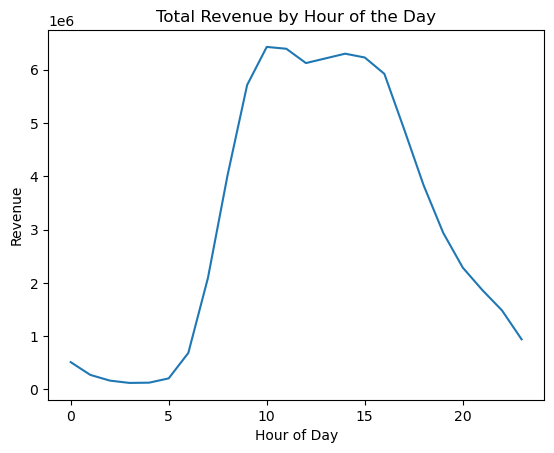

In [141]:
# Create a line chart for total revenue by hour of the day 
line_revenue_hod=sns.lineplot(data=revenue_hod, x='order_hour_of_day', y='prices')

line_revenue_hod.set(xlabel='Hour of Day', ylabel='Revenue')
line_revenue_hod.set_title('Total Revenue by Hour of the Day')

In [142]:
# Export the line chart for revenue by hour of the day
line_revenue_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_revenue_hod.png'))

In [164]:
df_instacart['busiest_slowest_days'].value_counts(dropna=False)

busiest_slowest_days
Regular busy    12914068
Busiest days    11862627
Slowest days     7623037
Name: count, dtype: int64

In [165]:
df_instacart['average_spending'].describe()

count    3.239973e+07
mean     7.790994e+00
std      7.348239e-01
min      1.000000e+00
25%      7.378488e+00
50%      7.811946e+00
75%      8.229341e+00
max      2.320000e+01
Name: average_spending, dtype: float64